In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))
# fix random seed for reproducibility
tf.random.set_seed(8)

Num GPUs Available:  1


In [23]:
# Hyperparameter
TRAIN_TEST_RATIO = 0.8
TIME_STEP = 8
MODEL_TYPE = "CNN_LSTM"
EPOCH_SIZE = 200
BATCH_SIZE = 16 
MODEL_JSON = {}
def to_string():
    print_list = [
        f"Time step: {TIME_STEP}",
        f"Ratio: {TRAIN_TEST_RATIO}",
        f"Model type: {MODEL_TYPE}",
        f"Epoch size: {EPOCH_SIZE}",
        f"Batch size: {BATCH_SIZE}",
        f"Model json: {MODEL_JSON}",
    ]
    return "\n".join(print_list)
VERSION = 17
model = tf.keras.models.load_model(f"./Model/{VERSION}")

12
[1446   36  177  189  219  226  155  119  104   97   73   47]
[ 0.     2.479  4.958  7.437  9.916 12.395 14.874 17.353 19.832 22.311
 24.79  27.269 29.748]
[0.50069252 0.01246537 0.06128809 0.06544321 0.07583102 0.07825485
 0.05367036 0.04120499 0.03601108 0.03358726 0.02527701 0.01627424]


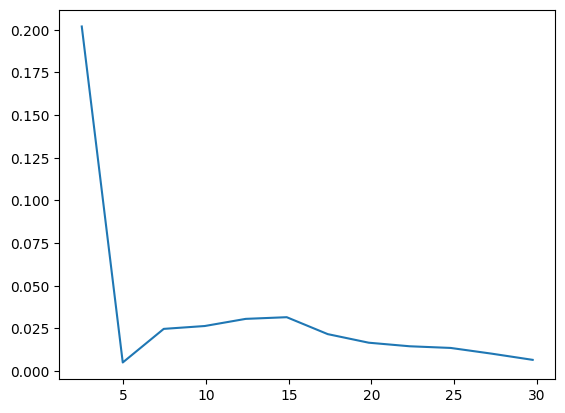

In [9]:
dataframe20 = pd.read_excel('Data/Data_1h/Data_1h/Solar_System_2.xlsx', sheet_name="2020", header=1, usecols=[11])
dataframe21 = pd.read_excel('Data/Data_1h/Data_1h/Solar_System_2.xlsx', sheet_name="2021", header=1, usecols=[11])
dataframe22 = pd.read_excel('Data/Data_1h/Data_1h/Solar_System_2.xlsx', sheet_name="2022", header=1, usecols=[11])
dataframe23 = pd.read_excel('Data/Data_1h/Data_1h/Solar_System_2.xlsx', sheet_name="2023", header=1, usecols=[11])
dataset = dataframe23.values
# dataset = np.append(dataset, dataframe21.values)
# dataset = np.append(dataset, dataframe22.values)
# dataset = np.append(dataset, dataframe23.values)
dataset = dataset.astype('float64')
dataset = np.reshape(dataset, (-1, 1))

#Preprocessing
dataset[dataset<0] = 0
dataset[np.isnan(dataset)] = 0
bins_size = int(1 + 3.3*np.log10(len(dataset)))
print(bins_size)
counts, bin_dataset = np.histogram(dataset, bins=bins_size, density=True)
counts_number, bin_dataset = np.histogram(dataset, bins=bins_size)
rel_freq =counts_number/len(dataset)
print(counts_number)
print(bin_dataset)
print(rel_freq)
plt.plot()
plt.plot(bin_dataset[1:],counts,label="actual_pdf")
# plt.clf()
# plt.figure(figsize=(100,60))
# plt.rcParams.update({'font.size': 100})
# plt.plot(dataset)
# plt.show()

Normalize the dataset, when working with sigmoid or tanh function as activation function, normalize data to range 0, 1

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
model = tf.keras.models.load_model(f"./Model/{VERSION}")
datasetX, datasetY = create_dataset(dataset)
result = model.predict(dataset)
plt.plot(dataset)
plt.plot(result)
